In [1]:
from DidiDataset import DidiTrajectoryDataset
import numpy as np
import matplotlib.pyplot as plt
import torch

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
dataset = DidiTrajectoryDataset('E:/Data/Didi/xian/nov', traj_length=200, feature_mean=[0, 0, 0], feature_std=[1, 1, 1])

In [6]:
# compute mean and std of time (minutes) in a month
minite_in_month = torch.arange(0, 60*24*30, 1).to(torch.float32)
print(torch.mean(minite_in_month))
print(torch.std(minite_in_month))

tensor(21599.4980)
tensor(12470.9102)


In [7]:
weights = []
stats = torch.zeros(dataset.n_files, 4)     # lon mean, lat mean, lon std, lat std
while dataset.loadNextFiles(1):
    print(f"Dataset {dataset.part_idx} has length {len(dataset)}")
    weights.append(len(dataset))
    points = torch.cat([lonlat for lonlat, _, _ in dataset], dim=1)
    stats[dataset.part_idx-1] = torch.cat([points.mean(dim=1), points.std(dim=1)])
print(stats)

Loading E:/Data/Didi/xian/nov\gps_20161101.pt
Dataset 1 has length 50913
Loading E:/Data/Didi/xian/nov\gps_20161102.pt
Dataset 2 has length 27711
Loading E:/Data/Didi/xian/nov\gps_20161103.pt
Dataset 3 has length 54043
Loading E:/Data/Didi/xian/nov\gps_20161104.pt
Dataset 4 has length 61244
Loading E:/Data/Didi/xian/nov\gps_20161105.pt
Dataset 5 has length 66740
Loading E:/Data/Didi/xian/nov\gps_20161106.pt
Dataset 6 has length 55248
Loading E:/Data/Didi/xian/nov\gps_20161107.pt
Dataset 7 has length 51717
Loading E:/Data/Didi/xian/nov\gps_20161108.pt
Dataset 8 has length 51735
Loading E:/Data/Didi/xian/nov\gps_20161109.pt
Dataset 9 has length 51317
Loading E:/Data/Didi/xian/nov\gps_20161110.pt
Dataset 10 has length 51398
Loading E:/Data/Didi/xian/nov\gps_20161111.pt
Dataset 11 has length 61886
Loading E:/Data/Didi/xian/nov\gps_20161112.pt
Dataset 12 has length 60044
Loading E:/Data/Didi/xian/nov\gps_20161113.pt
Dataset 13 has length 49220
Loading E:/Data/Didi/xian/nov\gps_20161114.pt
D

In [8]:
stats

tensor([[1.0895e+02, 3.4244e+01, 2.2415e-02, 1.9309e-02],
        [1.0895e+02, 3.4244e+01, 2.2584e-02, 1.9282e-02],
        [1.0895e+02, 3.4243e+01, 2.2326e-02, 1.9281e-02],
        [1.0895e+02, 3.4243e+01, 2.2193e-02, 1.9217e-02],
        [1.0895e+02, 3.4242e+01, 2.2581e-02, 1.9689e-02],
        [1.0895e+02, 3.4243e+01, 2.2570e-02, 1.9443e-02],
        [1.0895e+02, 3.4244e+01, 2.2282e-02, 1.9370e-02],
        [1.0895e+02, 3.4244e+01, 2.2292e-02, 1.9213e-02],
        [1.0895e+02, 3.4244e+01, 2.1868e-02, 1.9235e-02],
        [1.0895e+02, 3.4244e+01, 2.1903e-02, 1.9408e-02],
        [1.0895e+02, 3.4244e+01, 2.1712e-02, 1.9360e-02],
        [1.0895e+02, 3.4243e+01, 2.1952e-02, 1.9595e-02],
        [1.0895e+02, 3.4244e+01, 2.2093e-02, 1.9365e-02],
        [1.0895e+02, 3.4244e+01, 2.1777e-02, 1.9266e-02],
        [1.0895e+02, 3.4244e+01, 2.1630e-02, 1.8781e-02],
        [1.0895e+02, 3.4243e+01, 2.1698e-02, 1.8847e-02],
        [1.0895e+02, 3.4244e+01, 2.1690e-02, 1.9071e-02],
        [1.089

In [9]:
weights = np.array(weights)
weights = weights / weights.sum()
print(len(weights))
print(stats.shape)
print(weights)

30
torch.Size([30, 4])
[0.03256004 0.01772183 0.03456175 0.03916696 0.04268178 0.03533238
 0.03307422 0.03308573 0.03281841 0.03287021 0.03957753 0.03839953
 0.03147733 0.02789152 0.02543639 0.02855791 0.03045217 0.03428995
 0.03924754 0.0336063  0.03229656 0.02733258 0.02866343 0.03365746
 0.04005398 0.0418165  0.03431553 0.0328894  0.03343683 0.03272824]


In [10]:
stats = stats.numpy()

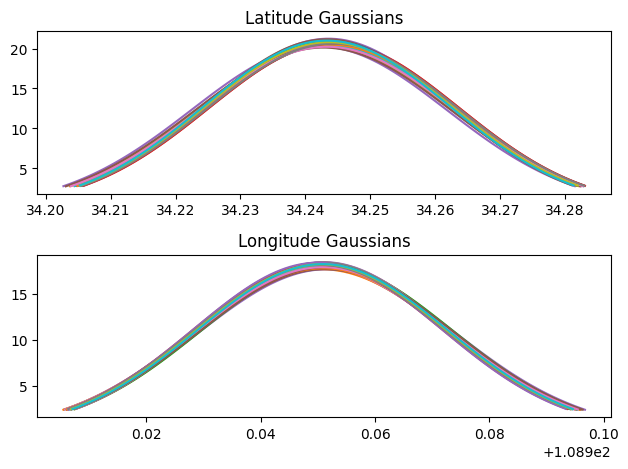

In [11]:

plt.subplot(2, 1, 1)
plt.title("Latitude Gaussians")
# Plot latitude Gaussians
lat_means = stats[:, 1]
lat_stds = stats[:, 3]
for i in range(len(lat_means)):
    x = np.linspace(lat_means[i] - 2 * lat_stds[i], lat_means[i] + 2 * lat_stds[i], 100)
    fx = np.exp(-(x - lat_means[i]) ** 2 / (2 * lat_stds[i] ** 2)) / (lat_stds[i] * np.sqrt(2 * np.pi))
    plt.plot(x, fx)


plt.subplot(2, 1, 2)
plt.title("Longitude Gaussians")
lon_means = stats[:, 0]
lon_stds = stats[:, 2]
for i in range(len(lon_means)):
    x = np.linspace(lon_means[i] - 2 * lon_stds[i], lon_means[i] + 2 * lon_stds[i], 100)
    fx = np.exp(-(x - lon_means[i]) ** 2 / (2 * lon_stds[i] ** 2)) / (lon_stds[i] * np.sqrt(2 * np.pi))
    plt.plot(x, fx)

# parser layout
plt.tight_layout()
plt.show()


In [12]:
overll_lon_mean = (lon_means * weights).sum()
overll_lat_mean = (lat_means * weights).sum()
overall_lon_std = np.sqrt(np.sum(weights * (lon_stds ** 2 + lon_means ** 2)) - overll_lon_mean ** 2)
overall_lat_std = np.sqrt(np.sum(weights * (lat_stds ** 2 + lat_means ** 2)) - overll_lat_mean ** 2)
print(f"Overall longitude mean: {overll_lon_mean}, std: {overall_lon_std}")
print(f"Overall latitude mean: {overll_lat_mean}, std: {overall_lat_std}")

Overall longitude mean: 108.950773428688, std: 0.02129110045580343
Overall latitude mean: 34.24354179925547, std: 0.019358855648211895


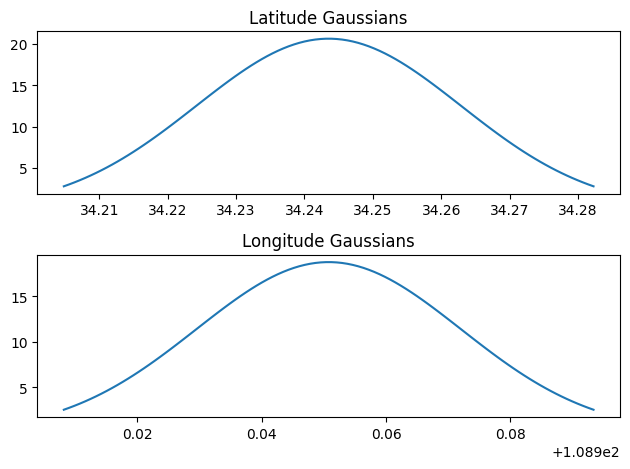

In [13]:
plt.subplot(2, 1, 1)
plt.title("Latitude Gaussians")
x = np.linspace(overll_lat_mean - 2 * overall_lat_std, overll_lat_mean + 2 * overall_lat_std, 100)
fx = np.exp(-(x - overll_lat_mean) ** 2 / (2 * overall_lat_std ** 2)) / (overall_lat_std * np.sqrt(2 * np.pi))
plt.plot(x, fx)

plt.subplot(2, 1, 2)
plt.title("Longitude Gaussians")
x = np.linspace(overll_lon_mean - 2 * overall_lon_std, overll_lon_mean + 2 * overall_lon_std, 100)
fx = np.exp(-(x - overll_lon_mean) ** 2 / (2 * overall_lon_std ** 2)) / (overall_lon_std * np.sqrt(2 * np.pi))
plt.plot(x, fx)

plt.tight_layout()
plt.show()